<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/06/0613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%%capture
!pip install umap-learn umap-learn[plot]

## Umap-learn python library

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

# figure size in inches
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import umap

sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 8]

## UMAP embedding of iris data

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

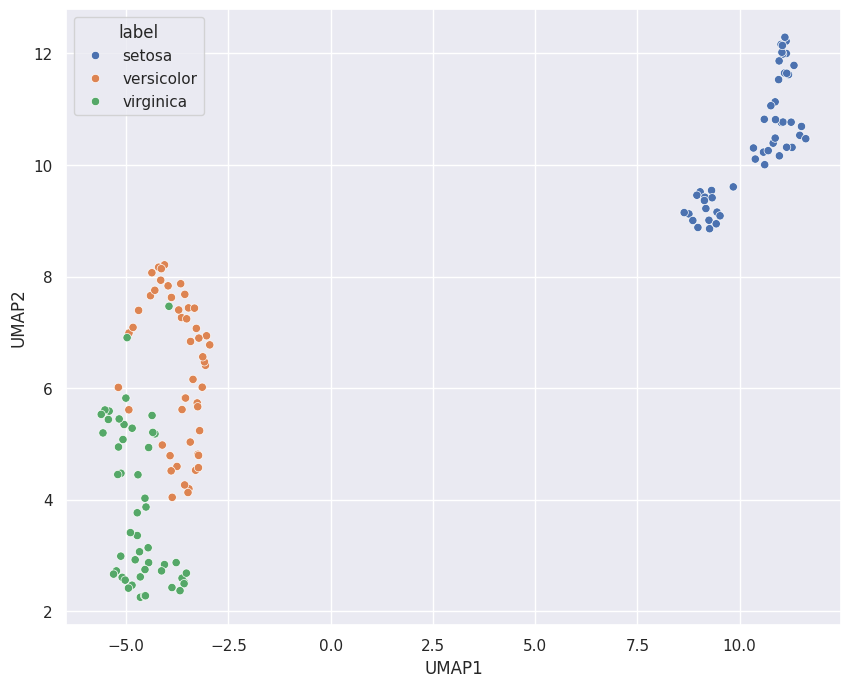

In [3]:
# Load the data
iris = load_iris()

iris_data = iris['data']
iris_label = iris['target_names'][iris['target']]

# Scale iris data
scaled_iris_data = StandardScaler().fit_transform(iris_data)

# Transform the data
umap_obj = umap.UMAP(n_neighbors=20)
umap_obj = umap_obj.fit(scaled_iris_data)
embedding = umap_obj.transform(scaled_iris_data)

# Plot embeded data
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['label'] = iris_label

sns.scatterplot(embedding_df, x='UMAP1', y='UMAP2', hue='label')

In [4]:
umap_obj.embedding_

array([[11.021034 , 10.760846 ],
       [ 9.0358515,  9.519232 ],
       [ 9.448442 ,  9.154915 ],
       [ 9.2511   ,  9.009492 ],
       [10.870045 , 11.131568 ],
       [11.142956 , 11.99847  ],
       [10.339505 , 10.304592 ],
       [10.973309 , 10.16428  ],
       [ 8.760993 ,  9.122976 ],
       [ 9.315    ,  9.543681 ],
       [10.955339 , 11.529788 ],
       [10.584452 , 10.229948 ],
       [ 8.95564  ,  9.457804 ],
       [ 8.856793 ,  9.005116 ],
       [11.137994 , 12.22042  ],
       [11.013872 , 12.161664 ],
       [11.053811 , 11.987846 ],
       [11.061893 , 10.7695265],
       [11.035636 , 12.020533 ],
       [11.197467 , 11.619819 ],
       [11.472295 , 10.532112 ],
       [11.100268 , 11.647904 ],
       [10.60427  , 10.818765 ],
       [10.700449 , 10.25684  ],
       [10.384598 , 10.105826 ],
       [ 9.151899 ,  9.422024 ],
       [10.821433 , 10.39119  ],
       [11.261365 , 10.767046 ],
       [11.284056 , 10.315755 ],
       [ 9.522552 ,  9.089015 ],
       [ 9

In [5]:
umap_obj.graph_

<150x150 sparse matrix of type '<class 'numpy.float32'>'
	with 3594 stored elements in Compressed Sparse Row format>

## UMAP embedding of digits data

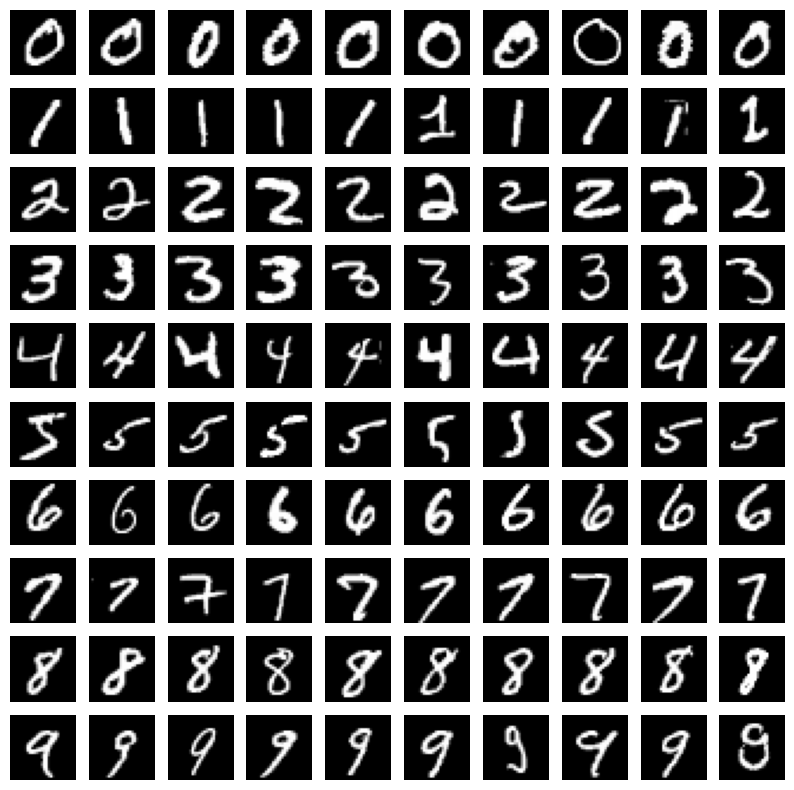

In [6]:
# Load the digits data
mnist = fetch_openml('mnist_784', parser='auto')

# Normalize digits data
mnist_data = mnist.data/255
mnist_label = mnist.target

n_row = 10
n_col = 10
fig, axes = plt.subplots(n_row, n_col, figsize=(10, 10))

mnist_data_np = mnist_data.to_numpy() # (70000,784)
mnist_labels_np = mnist_label.to_numpy() # (70000,)

# Loop through subplots to populate them with MNIST digits
for i in range(n_row):
    # Get indices of digits that match the current row number (i.e., '0' for the first row, '1' for the second, etc.)
    # np.where(mnist_labels_np == str(i)): 只有一個元素的 tuple
    indices = np.where(mnist_labels_np == str(i))[0][:n_col]  # Take first 'n_col' indices

    for j in range(n_col):
        ax = axes[i, j]  # Get the subplot

        # Reshape the 784-number array back to a 28x28 image and plot it
        ax.imshow(mnist_data_np[indices[j]].reshape(28, 28), cmap='gray')

        # Hide axis labels and ticks
        ax.axis('off')

# Show the grid of MNIST digits
plt.show()

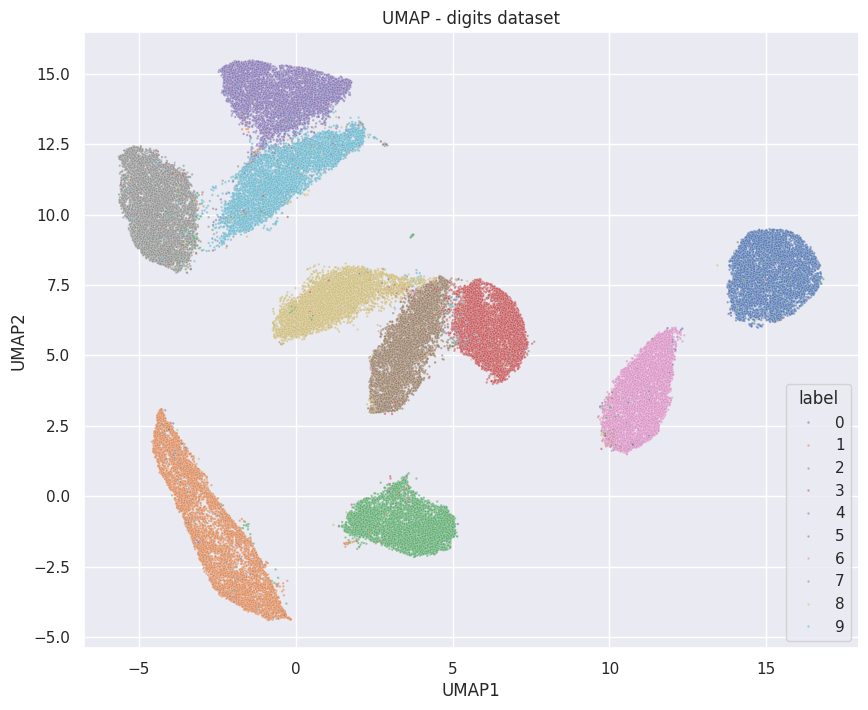

In [10]:
# Perfrom UMAP dimensionality reduction
umap_obj = umap.UMAP()
embedding = umap_obj.fit_transform(mnist_data)

# Plot embeddings
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['label'] = mnist_label

sns.scatterplot(embedding_df, x='UMAP1', y='UMAP2', hue='label', alpha=0.6, s=3)
plt.title('UMAP - digits dataset')
plt.show() # UMAP has even grouped the digits that look alike, for example, digit 8 and digit 3

### UMAP plotting capabilities

In [15]:
import umap.plot as uplot

<Axes: >

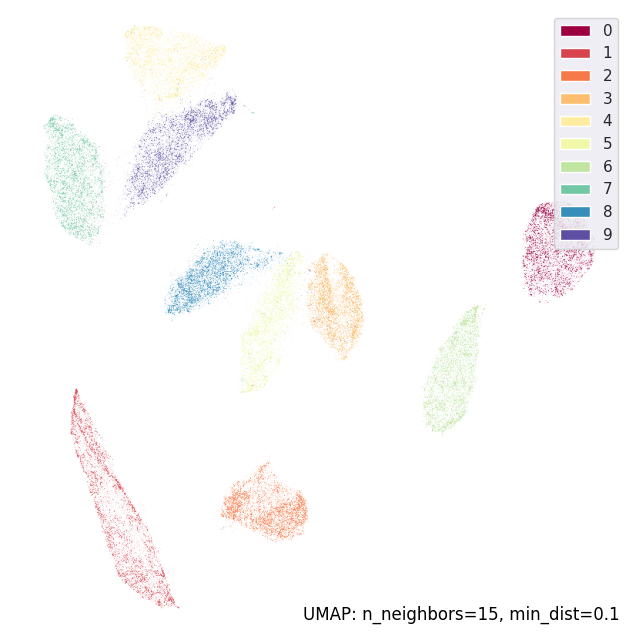

In [16]:
# Plot with visible densities and labels
uplot.points(umap_obj, labels=mnist_label)

<Axes: >

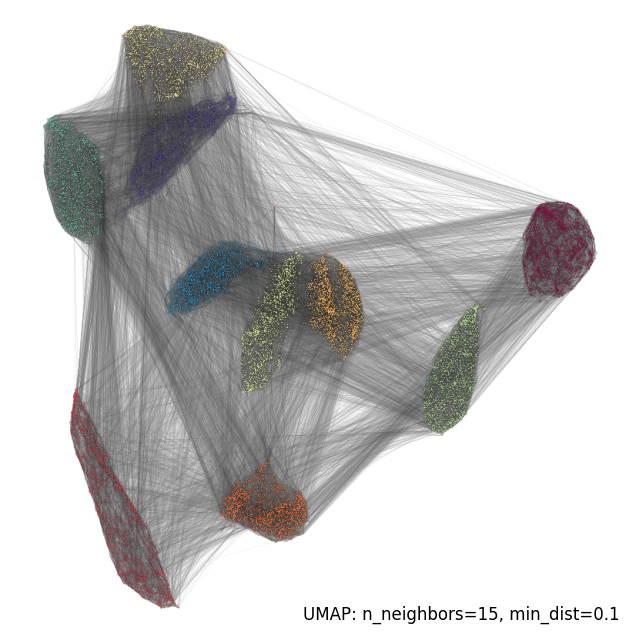

In [17]:
uplot.connectivity(umap_obj, show_points=True, labels=mnist_label)